In [27]:
# %pip install seaborn
# %pip install scikit-image
# %pip install pip --upgrade

In [28]:
import os
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.measure import block_reduce


In [29]:
def apply_kernel_operation(bw_image, kernel_size=(4, 4), operation='max'):
    if operation == 'mean':
        processed_image = block_reduce(bw_image, kernel_size, np.mean)
        processed_image = np.where(processed_image > 128, 255, 0)
    elif operation == 'max':
        processed_image = block_reduce(bw_image, kernel_size, np.max)
    return processed_image

def load_image_as_bw(image_path, kernel=4, operation='max'):
    """
    Load the image, convert it to grayscale, and then to binary (black and white).
    """
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    np_image = np.array(image)
    bw_image = np.where(np_image > 128, 255, 0)  # Convert to black and white
    reduced_image = apply_kernel_operation(bw_image, kernel_size=(kernel, kernel), operation=operation)
    return reduced_image


def extract_white_pixel_positions(bw_image):
    """
    Extract the x and y positions of white pixels in the black and white image.
    """
    # Find indices of white pixels
    y_indices, x_indices = np.where(bw_image == 255)
    return x_indices, y_indices

def draw_joint(image_path, output_path, kernel=4, operation='max',
               save=False, display=True, width=960, height=720, kind="kde"):
    """
    Draw a joint plot of the white pixel positions in the image.
    Kind can be
    - "kde" for kernel density estimation
    - "hex" for hexbin plot
    - "hist" for histogram
    - "scatter" for scatter plot
    - "reg" for regression plot
    - "resid" for residual plot
    """
    bw_image = load_image_as_bw(image_path, kernel=kernel, operation=operation)
    # plt.imshow(bw_image, cmap="gray")
    # plt.show()
    x_indices, y_indices = extract_white_pixel_positions(bw_image)
    plt.figure(figsize=(width/100, height/100))
    joint = sns.jointplot(x=x_indices, y=y_indices, kind=kind, color="k")
    joint.set_axis_labels('X', 'Y', fontsize=16)
    joint.figure.set_figheight(height/100)
    joint.figure.set_figwidth(width/100)
    plt.gca().invert_yaxis()  # Invert y-axis to match image orientation
    if save:
        joint.savefig(output_path, bbox_inches="tight")
    if display:
        plt.show()
    plt.close()



6572 images to process
Processing c:\Users\Lilly\Documents\GitHub\bad-apple\src\../frames/frame-0001.jpg


<Figure size 960x720 with 0 Axes>

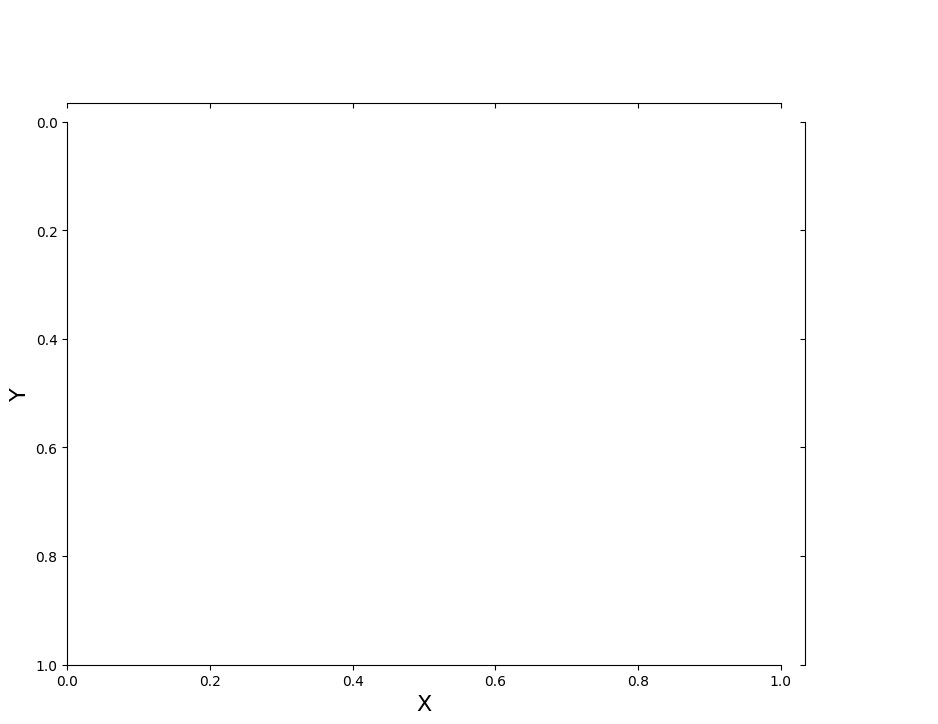

Processing c:\Users\Lilly\Documents\GitHub\bad-apple\src\../frames/frame-0002.jpg


<Figure size 960x720 with 0 Axes>

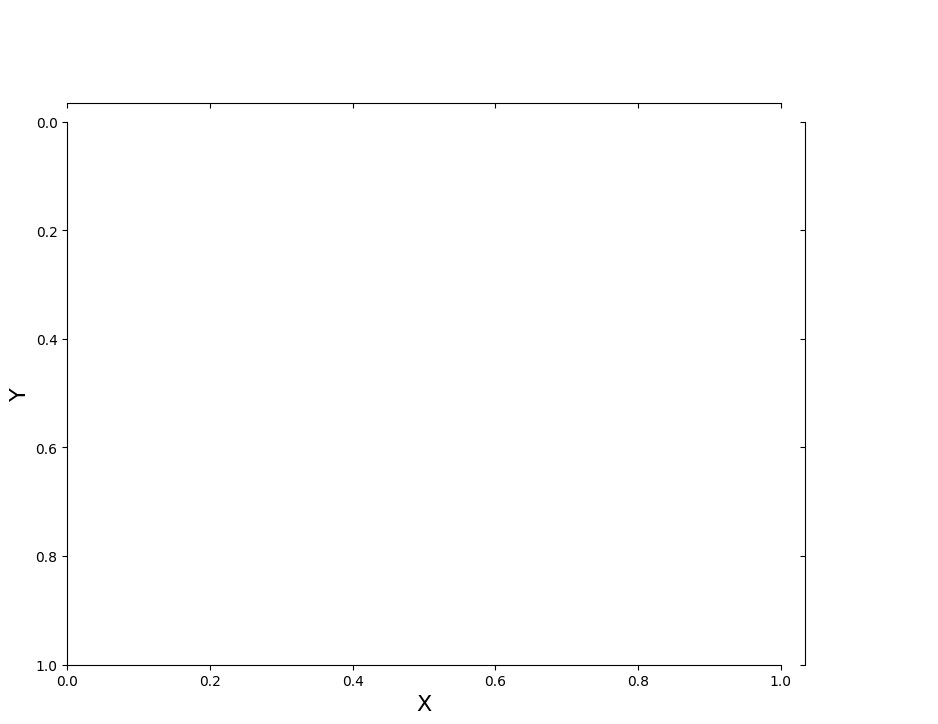

Processing c:\Users\Lilly\Documents\GitHub\bad-apple\src\../frames/frame-0003.jpg


<Figure size 960x720 with 0 Axes>

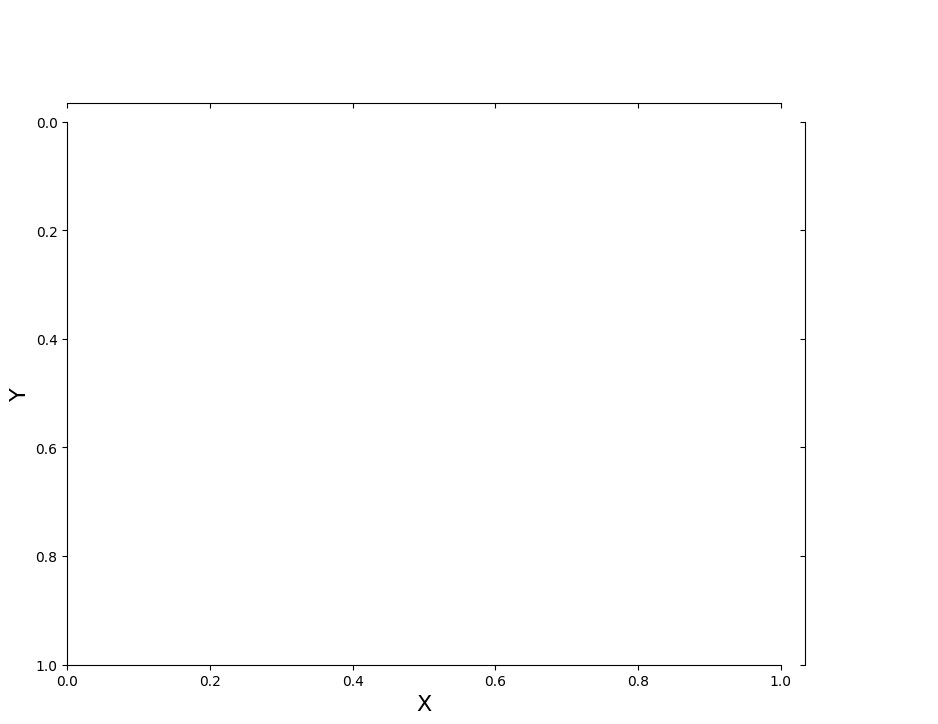

Processing c:\Users\Lilly\Documents\GitHub\bad-apple\src\../frames/frame-0004.jpg


<Figure size 960x720 with 0 Axes>

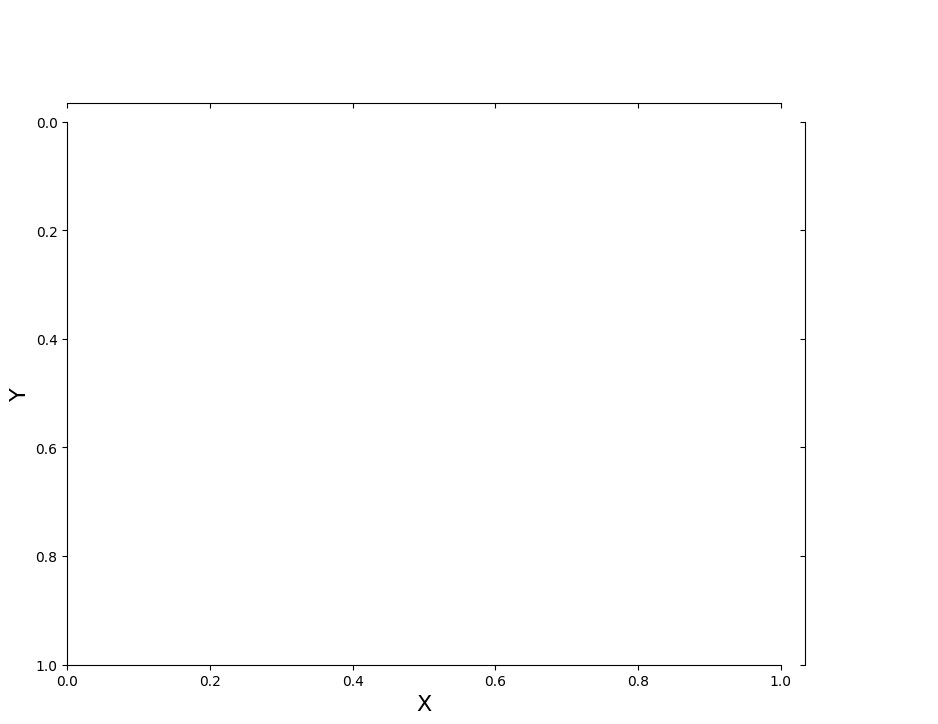

Processing c:\Users\Lilly\Documents\GitHub\bad-apple\src\../frames/frame-0005.jpg


<Figure size 960x720 with 0 Axes>

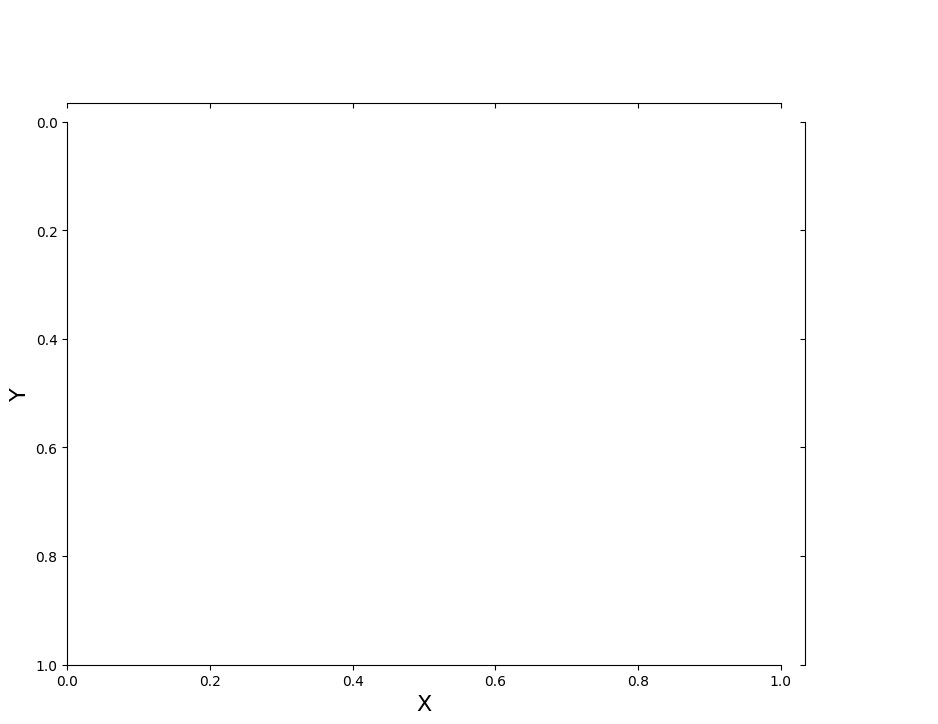

Processing c:\Users\Lilly\Documents\GitHub\bad-apple\src\../frames/frame-0006.jpg


<Figure size 960x720 with 0 Axes>

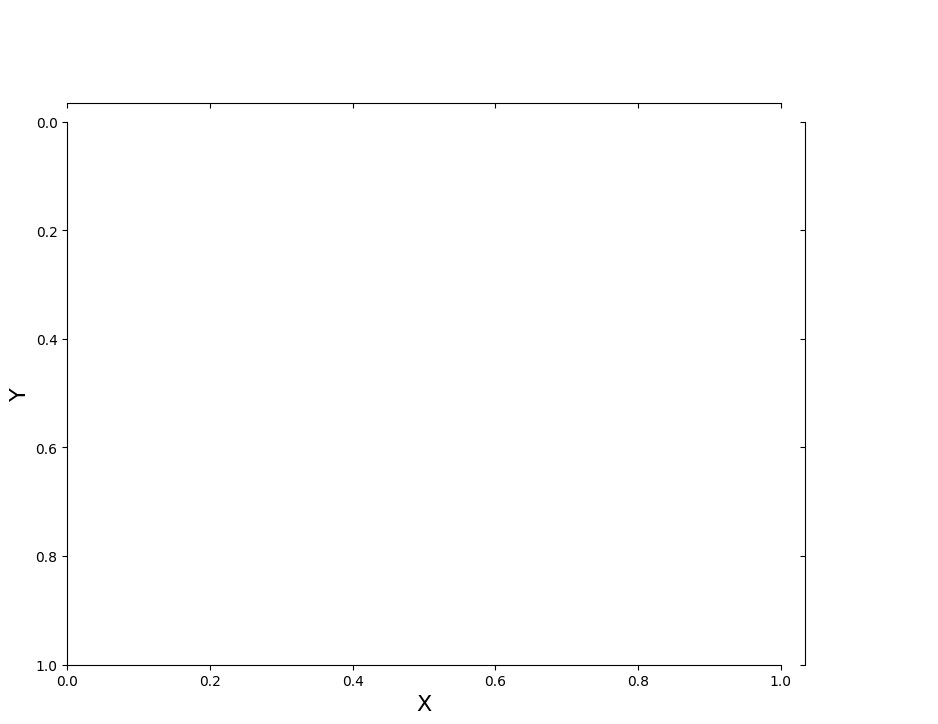

Processing c:\Users\Lilly\Documents\GitHub\bad-apple\src\../frames/frame-0007.jpg


<Figure size 960x720 with 0 Axes>

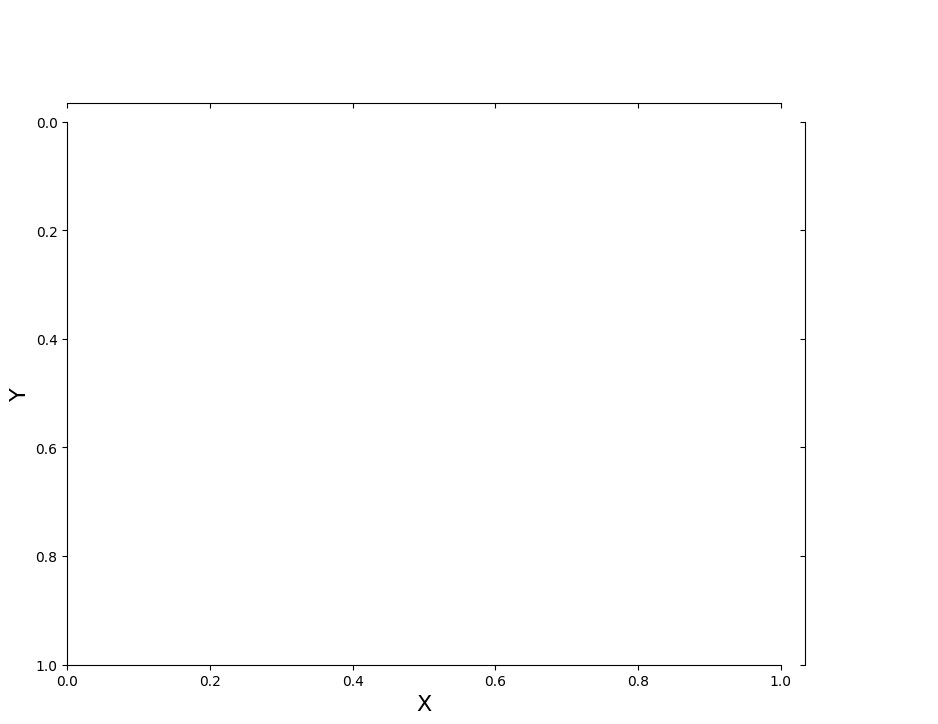

Processing c:\Users\Lilly\Documents\GitHub\bad-apple\src\../frames/frame-0008.jpg


<Figure size 960x720 with 0 Axes>

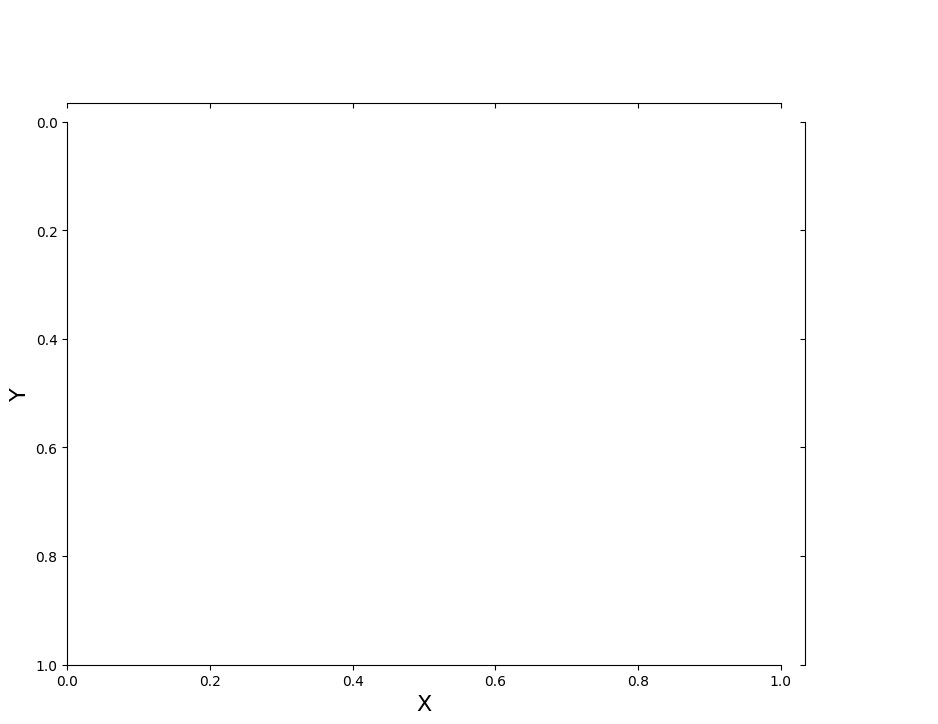

Processing c:\Users\Lilly\Documents\GitHub\bad-apple\src\../frames/frame-0009.jpg


<Figure size 960x720 with 0 Axes>

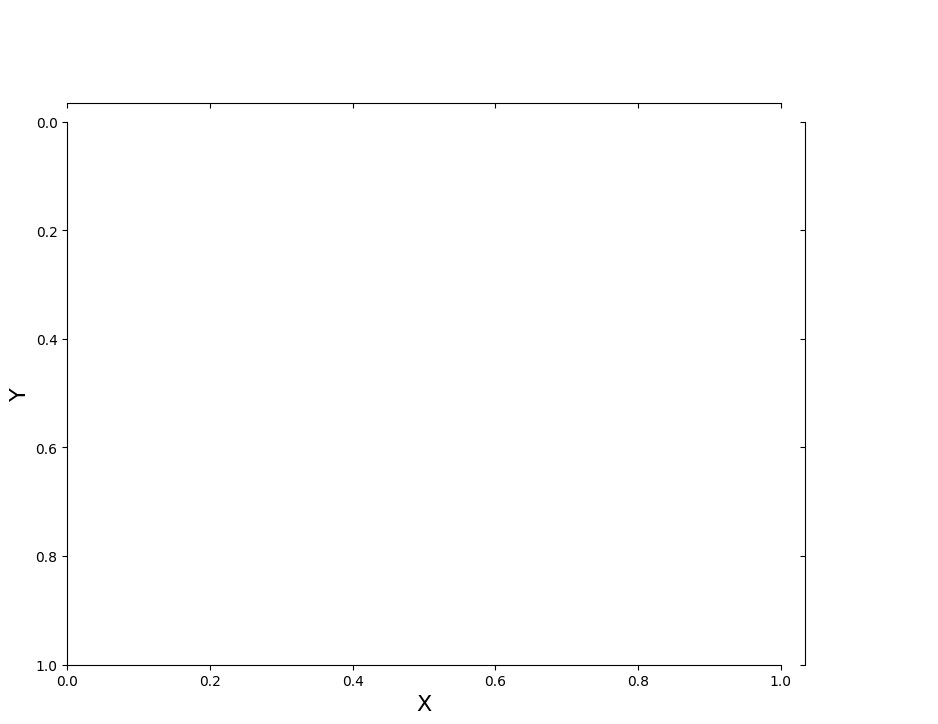

In [30]:
current_dir = os.getcwd()
frames_dir = os.path.join(current_dir, "../frames/")
output_dir = os.path.join(current_dir, "../output/")
frames_list = os.listdir(frames_dir)
frames_list.sort()
height = 720
width = 960
print(f"{len(frames_list)} images to process")
for frame in frames_list:
    frame_path = os.path.join(frames_dir, frame)
    output_path = os.path.join(output_dir, frame)
    print(f"Processing {frame_path}")
    draw_joint(frame_path, output_path, kernel=8, operation='max',
               save=True, display=False, width=width, height=height)


